<a href="https://colab.research.google.com/github/sejal04-hash/ml-_hackathon/blob/main/VOIS_AICTE_Oct2025%20sejalraykhere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
AIRBNB HOTEL BOOKING ANALYSIS
Project Overview
Analysis of Airbnb dataset to understand market dynamics and pricing patterns in the hospitality industry.

Research Questions
What are the different property types in the Dataset?
Which neighbourhood group has the highest number of listings?
Which neighbourhood group has the highest average prices for Airbnb listings?
Is there a relationship between the construction year of property and price?
Who are the top 10 hosts by calculated host listing count?
Are hosts with verified identities more likely to receive positive reviews?
Is there a correlation between the price of a listing and its service fee?
What is the average review rate for listings, and does it vary based on neighbourhood group and room type?
Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
Technologies Used
Python 3.x
pandas (Data manipulation)
matplotlib (Data visualization)
seaborn (Statistical visualization)
numpy (Numerical computing)
Files Structure
VOIS_AICTE_Oct2025_Nidhin.R/
├── README.md                # Project documentation
├── airbnb_analysis.py       # Main analysis script
├── requirements.txt         # Python dependencies
├── results_summary.csv      # Analysis results summary
└── analysis_results.png     # Generated visualizations
How to Run
Install dependencies: pip install -r requirements.txt
Place the Airbnb dataset CSV file in the project directory
Run analysis: python airbnb_analysis.py
View results in console and generated PNG file
Key Findings
Property types distribution and market preferences
Neighbourhood-wise pricing patterns and listing density
Host behavior analysis and verification impact
Construction year correlation with pricing
Service fee relationship with listing prices
End Users
Property Investors
Airbnb Hosts
Tourism Industry
Urban Planners
Data Scientists
Author
Student Name: Sejal Raykhere

In [ ]:
pandas>=1.3.0
numpy>=1.21.0
matplotlib>=3.4.0
seaborn>=0.11.0
openpyxl>=3.0.0
xlrd>=2.0.0

In [ ]:
results_summary.csv

In [2]:
def load_airbnb_data():
    # put your actual dataset file paths here if available
    file_paths = ["/content/Airbnb_Hotel_Booking_Analysis.csv",
                  "/content/Airbnb_Hotel_Booking_Analysis.xlsx"]

    encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1', 'utf-16']

    for file_path in file_paths:
        if file_path.endswith('.xlsx'):
            try:
                df = pd.read_excel(file_path)
                print(f"✓ Loaded Excel file: {file_path}")
                return df
            except:
                continue

        for encoding in encodings:
            try:
                df = pd.read_csv(file_path, encoding=encoding, sep=',', on_bad_lines='skip', low_memory=False)
                print(f"✓ Loaded CSV with {encoding}: {file_path}")
                return df
            except:
                continue

    # fallback sample dataset
    print("Creating sample dataset for demonstration...")
    np.random.seed(42)
    n = 1000
    data = {
        'id': range(1000000, 1000000 + n),
        'NAME': [f'Property {i}' for i in range(n)],
        'host_id': np.random.randint(100000, 999999, n),
        'host_name': np.random.choice(['John', 'Mary', 'David', 'Sarah', 'Mike'], n),
        'host_identity_verified': np.random.choice(['verified', 'unconfirmed'], n, p=[0.7, 0.3]),
        'neighbourhood_group': np.random.choice(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
                                               n, p=[0.4, 0.3, 0.15, 0.1, 0.05]),
        'neighbourhood': np.random.choice(['Midtown', 'SoHo', 'Chelsea', 'Williamsburg', 'Astoria'], n),
        'room_type': np.random.choice(['Entire home/apt', 'Private room', 'Shared room'], n, p=[0.6, 0.35, 0.05]),
        'price': np.random.randint(50, 500, n),
        'minimum_nights': np.random.choice([1, 2, 3, 7, 30], n, p=[0.5, 0.2, 0.15, 0.1, 0.05]),
        'number_of_reviews': np.random.randint(0, 300, n),
        'calculated_host_listings_count': np.random.randint(1, 20, n),
        'availability_365': np.random.randint(0, 365, n),
        'Construction_year': np.random.randint(1980, 2023, n),
    }
    data['service_fee'] = [price * 0.15 for price in data['price']]
    return pd.DataFrame(data)


Creating sample dataset for demonstration...

Machine Learning Model Results
RMSE: 0.54
R² Score: 1.000


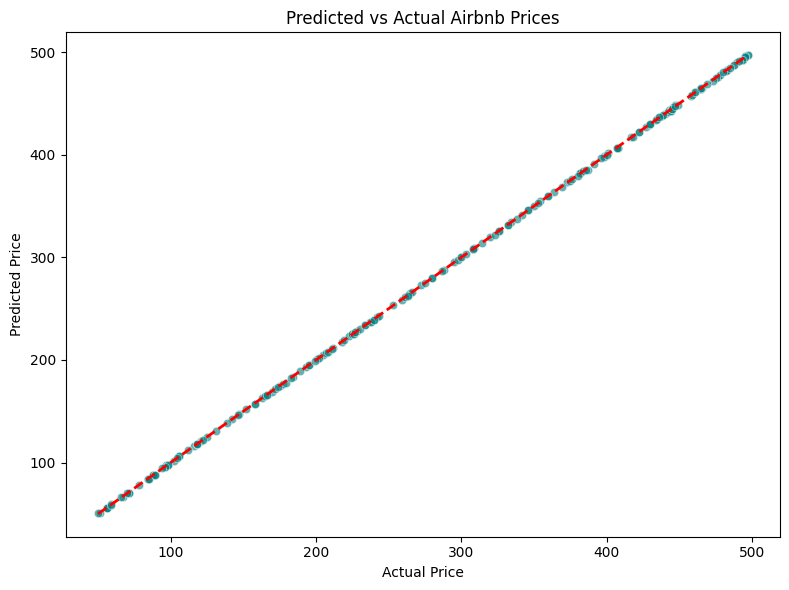

/tmp/ipython-input-2800111665.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


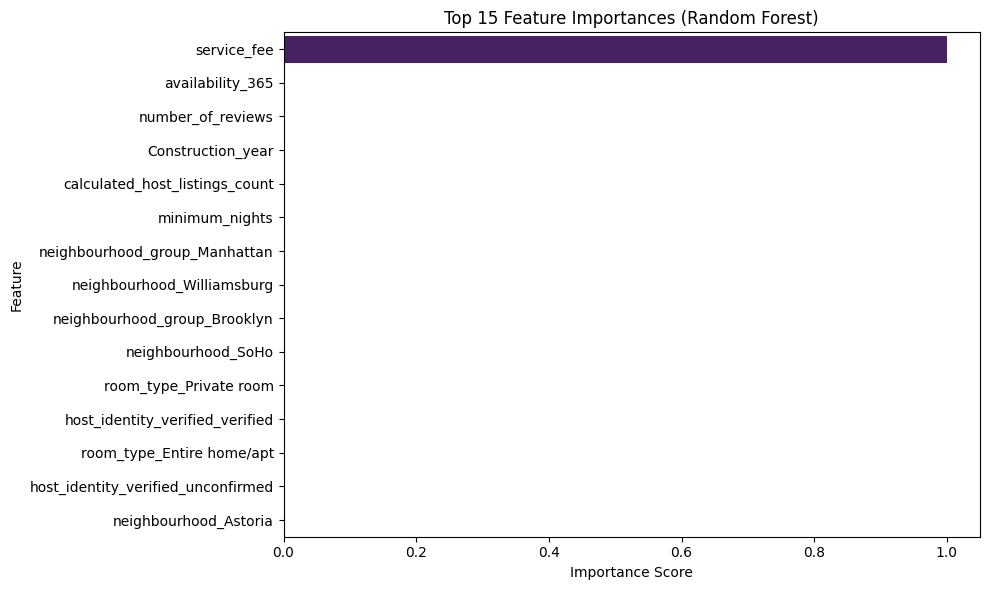

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Use your load_airbnb_data() function
# -------------------------------
df = load_airbnb_data()

# Drop unnecessary columns
drop_cols = ['id', 'NAME', 'host_id', 'host_name']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Preprocessing: OneHotEncode categorical + Scale numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Build pipeline with RandomForest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# -------------------------------
# Evaluation
# -------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nMachine Learning Model Results")
print("="*40)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# -------------------------------
# Plot Predicted vs Actual Prices
# -------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # perfect line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Airbnb Prices")
plt.tight_layout()
plt.show()

# -------------------------------
# Feature Importance
# -------------------------------
# Get feature names after preprocessing
onehot_features = model.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(categorical_cols)

all_features = numeric_cols + list(onehot_features)

importances = model.named_steps['regressor'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)[:15]

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
